# Neural networks from scratch

## Libraries and dataset

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

n_classes = 4
n_loops = 1
n_samples = 1500

def spirals(n_classes=3, n_samples=1500, n_loops=2):
    klass = np.random.choice(n_classes, n_samples)
    radius = np.random.rand(n_samples)
    theta = klass * 2 * math.pi / n_classes + radius * 2 * math.pi * n_loops
    radius = radius + 0.05 * np.random.randn(n_samples)
    return np.column_stack((radius * np.cos(theta), radius * np.sin(theta))).astype("float32"), klass

X, y = spirals(n_samples=n_samples, n_classes=n_classes, n_loops=n_loops)

## Visualize the dataset

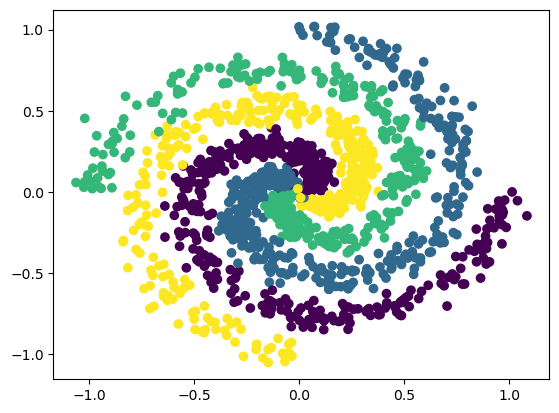

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)

## Activation functions

ReLU and sigmoid function and their derivative (should work for numpy
array of any dimension (1D, 2D,…))

In [3]:
def relu(v):
    return np.maximum(v, 0)


def drelu(v):
    return np.where(v <= 0, 0, 1)
 

def sigmoid(v):
    return 1 / (1 + np.exp(-v))


def dsigmoid(v):
    return np.exp(-v) / ((1 + np.exp(-v)) ** 2)

## Define the Multilayer Perceptron

First define the shape of the multilayer perceptron:

-   `n0`: size of input,
-   `n1`: size of hidden layer,
-   `n2`: size of output.

In [4]:
n0 = 2
n1 = 50
n2 = n_classes

Variables for weights, biases of each layers and gradients of loss wrt
to any intermediate quantity.

In [5]:
# Random weights
W1 = np.random.randn(n0, n1)
W2 = np.random.randn(n1, n2)

# Biases set to zero
b1 = np.zeros((n1, 1))
b2 = np.zeros((n2, 1))

# Gradients of loss
Lx_2 = np.zeros((n2, 1))
LW_2 = np.zeros((n1, n2))
Lb_2 = np.zeros((n2, 1))

Lx_1 = np.zeros((n1, 1))
LW_1 = np.zeros((n0, n1))
Lb_1 = np.zeros((n1, 1))

What about He’s initialization for `W1` and `W2`?

In [6]:
# Random weights with He's initialization
W1 = math.sqrt(2/n0) * np.random.randn(n0, n1)
W2 = math.sqrt(2/n0) * np.random.randn(n1, n2)

Define the learning rate and the activation functions along their
derivatives at each layer:

-   `eta`: learning rate
-   `af`, `daf`: activation function and its derivative for hidden layer

In [7]:
# Define eta, af, daf
eta = 0.01
af = relu
daf = drelu

## The learning loop (no minibatch)

In [8]:
nepochs = 15
for epoch in range(nepochs + 1):
    acc_epoch = 0

    # Here we are using stochastic gradient descent (minibatch of size 1)
    for idx, (x0, y2) in enumerate(zip(X, y)):
        x0 = x0.reshape((-1, 1))

        # Implement the forward pass: use `W1`, `x0`, `b1`, `af`, `W2`, `x1`,
        # `b2` to define `z1`, `x1`, `z2`, `x2`. Remember that there is no
        # activation function for the last layer
        z1 = W1.T @ x0 + b1
        x1 = af(z1)
        z2 = W2.T @ x1 + b2
        x2 = z2

        # Predicted class
        pred = np.argmax(x2)
        acc_epoch += (pred == y2)

        if idx % 100 == 0:
            print(f"Epoch: {epoch:02}, sample: {idx:04}, class: {y2}, pred: {pred}, output: {x2}")

        # One-hot encoding of class `y2`
        y2_one_hot = np.zeros((n2, 1))
        y2_one_hot[y2, 0] = 1

        # Softmax of output needed in the loss
        softmax_x2 = np.exp(x2) / sum(np.exp(x2))

        # Gradient of loss wrt output layer
        Lx_2 = softmax_x2 - y2_one_hot # gradient = prédiction - vérité

        # Gradient of loss wrt weights and biases in second layer
        LW_2 = x1 @ Lx_2.T
        Lb_2 = Lx_2

        # Gradient of loss wrt first layer
        Lx_1 = W2 @ Lx_2

        # Gradient of loss wrt weights and biases in first layer
        LW_1 = x0 @ (daf(z1) * Lx_1).T
        Lb_1 = daf(z1) * Lx_1

        # Gradient descent step: use `eta`, `Lw_1` `Lw_2` `Lb_1` `Lb_2` to
        # update `W1`, `W2`, `b1`, `b2`.
        W1 -= eta * LW_1
        W2 -= eta * LW_2
        b1 -= eta * Lb_1
        b2 -= eta * Lb_2

    print(f"Epoch: {epoch:02}, training accuracy: {acc_epoch/n_samples}")

Epoch: 00, sample: 0000, class: 3, pred: 1, output: [[-1.62715123]
 [ 7.52931268]
 [-1.76814884]
 [ 3.7202668 ]]
Epoch: 00, sample: 0100, class: 1, pred: 1, output: [[-0.77268185]
 [ 0.40653849]
 [ 0.04897007]
 [-1.32101061]]
Epoch: 00, sample: 0200, class: 1, pred: 2, output: [[ 0.32834287]
 [-0.15932553]
 [ 0.42265055]
 [ 0.22534351]]
Epoch: 00, sample: 0300, class: 3, pred: 2, output: [[-0.46631202]
 [ 1.24797283]
 [ 1.36854646]
 [ 0.73298639]]
Epoch: 00, sample: 0400, class: 0, pred: 3, output: [[0.51961764]
 [0.6476674 ]
 [0.34950463]
 [0.89541484]]
Epoch: 00, sample: 0500, class: 2, pred: 2, output: [[ 0.10536771]
 [-0.12827504]
 [ 0.15131501]
 [-0.40828189]]
Epoch: 00, sample: 0600, class: 3, pred: 0, output: [[ 0.90917961]
 [-0.13678614]
 [ 0.70671776]
 [ 0.72402709]]
Epoch: 00, sample: 0700, class: 3, pred: 0, output: [[ 0.28869522]
 [-2.336404  ]
 [-1.89861335]
 [-0.8298412 ]]
Epoch: 00, sample: 0800, class: 2, pred: 1, output: [[ 0.34154807]
 [ 1.54209486]
 [ 1.27723505]
 [-

## Visualization

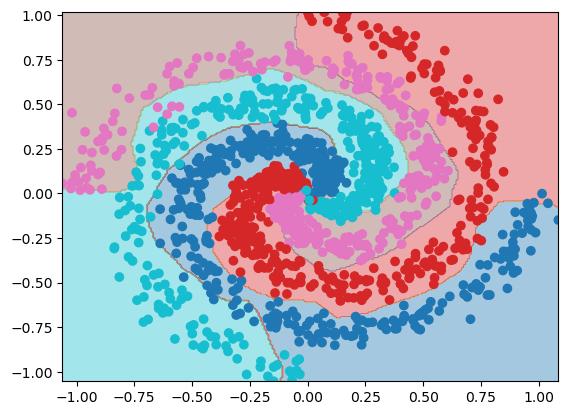

In [9]:
num = 250
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), num)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), num)
XX, YY = np.meshgrid(xx, yy)
points = np.c_[XX.ravel(), YY.ravel()]

# Forward pass on all points
z1 = W1.T @ points.T + b1
x1 = af(z1)
z2 = W2.T @ x1 + b2
x2_hat = np.argmax(z2, axis=0)

C = x2_hat.reshape(num, num)

plt.contourf(XX, YY, C, cmap=plt.get_cmap("tab10"), alpha=.4)
plt.scatter(*X.T, c=y, cmap=plt.get_cmap("tab10"))

plt.show()

## The learning loop with minibatch

In [11]:
n0 = 2
n1 = 100
n2 = n_classes

nepochs = 1000
batch_size = 64

# Random weights
W1 = np.random.randn(n0, n1)
W2 = np.random.randn(n1, n2)

# Biases set to zero
b1 = np.zeros(n1)
b2 = np.zeros(n2)

# Gradients of loss
LX_2 = np.zeros((batch_size, n2))
LW_2 = np.zeros((batch_size, n1, n2))
Lb_2 = np.zeros((batch_size, n2))

LX_1 = np.zeros((batch_size, n1))
LW_1 = np.zeros((batch_size, n0, n1))
Lb_1 = np.zeros((batch_size, n1))


def fake_dataloader(X, y, batch_size=32, shuffle=True):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)

    if shuffle:
        np.random.shuffle(indices)

    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_indices = indices[start:end]
        yield X[batch_indices], y[batch_indices]


for epoch in range(nepochs + 1):
    acc_epoch = 0

    for idx, (X0, y2) in enumerate(fake_dataloader(X, y, batch_size=batch_size)):
        # Implement the forward pass: use `W1`, `X0`, `b1`, `af`, `W2`, `X1`,
        # `b2` to define `Z1`, `X1`, `Z2`, `X2`. This time, `X0` is batch_size * 2 !
        Z1 = X0 @ W1 + b1
        X1 = af(Z1)
        Z2 = X1 @ W2 + b2
        X2 = Z2

        # Predicted class (use np.argmax with axis argument)
        #•	axis=0 = direction des batchs
	    #•	axis=1 = direction des classes'''
        #	•	argmax(axis=1) retourne la classe ayant le score maximal pour chaque élément

        pred = np.argmax(X2, axis=1)
        acc_epoch += sum(pred == y2)

        # One-hot encoding of classes in `y2` (use `np.eye`)
        #Donc y2 contient les classes correctes, celles dans ton dataset y.

        y2_one_hot = np.eye(n_classes)[y2]

        # Softmax of output needed in the loss (use `np.sum` with `keepdims`)
        softmax_X2 = np.exp(X2) / np.sum(np.exp(X2), axis=1, keepdims=True)
        # Gradient of loss wrt output layer
        LX_2 = softmax_X2 - y2_one_hot  # gradient = prédiction - vérité

        # Gradient of loss wrt weights and biases in second layer
        # Since `LW_2` is 3-dimensional, operator `@` is not working anymore.
        # Use `np.einsum` here.
        LW_2 = np.einsum('Bk, Bl -> Bkl', X1, LX_2)
        Lb_2 = LX_2

        # Gradient of loss wrt first layer
        # Use `np.einsum` again.
        LX_1 = np.einsum("Bk,lk->Bl", (1 * LX_2), W2)

        # Gradient of loss wrt weights and biases in first layer
        LW_1 = np.einsum("Bk,Bl->Bkl", X0, (daf(Z1) * LX_1))
        Lb_1 = daf(Z1) * LX_1
        # </answer>

        # Gradient descent step: use `eta`, `Lw_1` `Lw_2` `Lb_1` `Lb_2` to
        # update `W1`, `W2`, `b1`, `b2`. Don't forget to average gradients over
        # the minibatch.
        # <answer>
        W1 -= eta * np.mean(LW_1, axis=0)
        W2 -= eta * np.mean(LW_2, axis=0)
        b1 -= eta * np.mean(Lb_1, axis=0)
        b2 -= eta * np.mean(Lb_2, axis=0)
        # </answer>

    print(f"Epoch: {epoch:02}, training accuracy: {acc_epoch/n_samples}")

Epoch: 00, training accuracy: 0.218
Epoch: 01, training accuracy: 0.2813333333333333
Epoch: 02, training accuracy: 0.326
Epoch: 03, training accuracy: 0.3233333333333333
Epoch: 04, training accuracy: 0.326
Epoch: 05, training accuracy: 0.32466666666666666
Epoch: 06, training accuracy: 0.34933333333333333
Epoch: 07, training accuracy: 0.356
Epoch: 08, training accuracy: 0.36666666666666664
Epoch: 09, training accuracy: 0.37866666666666665
Epoch: 10, training accuracy: 0.4066666666666667
Epoch: 11, training accuracy: 0.4093333333333333
Epoch: 12, training accuracy: 0.43533333333333335
Epoch: 13, training accuracy: 0.43333333333333335
Epoch: 14, training accuracy: 0.4493333333333333
Epoch: 15, training accuracy: 0.4533333333333333
Epoch: 16, training accuracy: 0.4786666666666667
Epoch: 17, training accuracy: 0.48533333333333334
Epoch: 18, training accuracy: 0.52
Epoch: 19, training accuracy: 0.5353333333333333
Epoch: 20, training accuracy: 0.54
Epoch: 21, training accuracy: 0.558
Epoch: 2

## Visualization

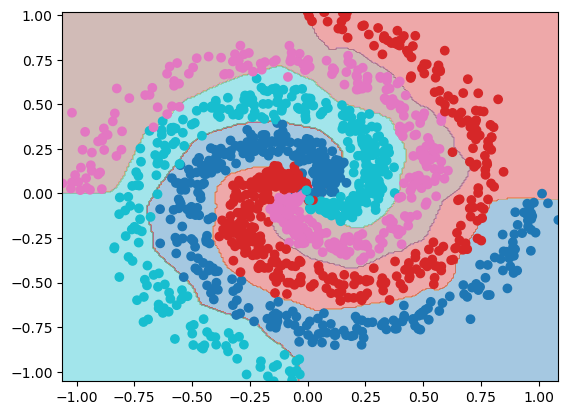

In [12]:
num = 250
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), num)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), num)
XX, YY = np.meshgrid(xx, yy)
points = np.c_[XX.ravel(), YY.ravel()]

# Forward pass on all points
Z1 = points @ W1 + b1
X1 = af(Z1)
Z2 = X1 @ W2 + b2
X2 = Z2
X2_hat = np.argmax(Z2, axis=1)

C = X2_hat.reshape(num, num)

plt.contourf(XX, YY, C, cmap=plt.get_cmap("tab10"), alpha=.4)
plt.scatter(*X.T, c=y, cmap=plt.get_cmap("tab10"))

plt.show()